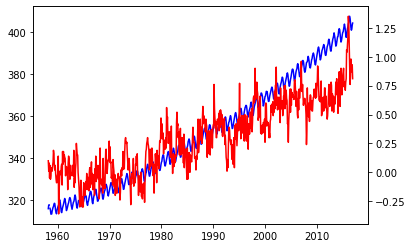

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
zip_demo= pd.read_pickle('zip_demo.p')
climate_change = pd.read_csv('climate_change.csv', index_col='date', parse_dates=['date'])


# Initalize a Figure and Axes
fig, ax= plt.subplots(1,1)

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='red')

plt.show()


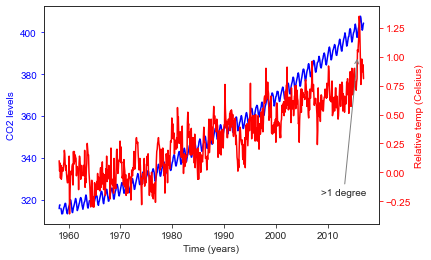

In [96]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)
    
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax,climate_change.index, climate_change['co2'], 'blue', 'Time (years)', 'CO2 levels')

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', 'Time (years)', 'Relative temp (Celsius)')

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree",xy=(pd.Timestamp('2015-10-06 00:00:00'), 1),xytext=(pd.Timestamp('2008-10-06 00:00:00'), -.2), arrowprops={'arrowstyle':'->', 'color':'gray'} )

plt.show()

               Bronze  Gold  Silver
United States      67   137      52


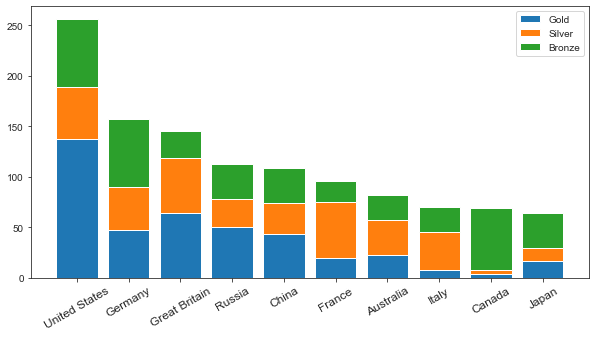

In [93]:
medals= pd.read_csv('medals_by_country_2016.csv', index_col=0)

print(medals.head(1))

fig, ax= plt.subplots()

## Setting the x labels and rotating the tick labels
#ax.set_xticklabels(medals.index, rotation= 90)

## Set the size of the figure
fig.set_size_inches([10,5])

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label='Gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom= medals['Gold'], label='Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom= medals['Gold']+ medals['Silver'], label= 'Bronze')

#This is to avoid the x labels of being cropped
#plt.tight_layout()
#fig.autolayout : True

plt.xticks(fontsize= 12, rotation=30)


# Display the legend
ax.legend()

# Save chart as image png jpg, etc and use bbox_inches to avoid getting the image cropped
fig.savefig('figure_10_5.png', bbox_inches = "tight")


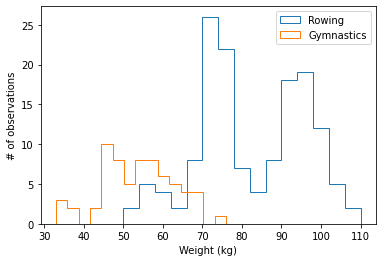

In [30]:
summer= pd.read_csv('summer2016.csv')

mens_rowing= summer[summer['Sport']=='Rowing']
mens_gymnastics= summer[summer['Sport']=='Gymnastics']


fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], histtype= 'step', label='Rowing', bins=15)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], histtype= 'step', label='Gymnastics', bins= 15)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()


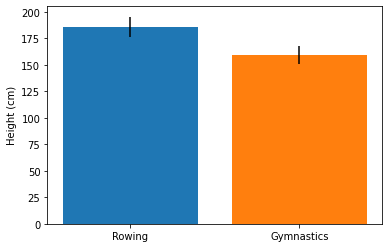

In [32]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

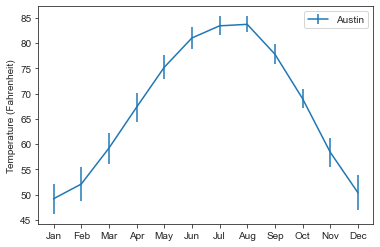

In [101]:
import calendar
seattle_weather= pd.read_csv('seattle_weather.csv')
austin_weather= pd.read_csv('austin_weather.csv')


fig, ax = plt.subplots()
import calendar

seattle_weather['MONTH'] = seattle_weather['DATE'].apply(lambda x: calendar.month_abbr[x])
austin_weather['MONTH'] = austin_weather['DATE'].apply(lambda x: calendar.month_abbr[x])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['MONTH'], austin_weather["MLY-TAVG-NORMAL"], yerr=austin_weather["MLY-TAVG-STDDEV"], label='Austin') 

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")
ax.legend()

plt.show()



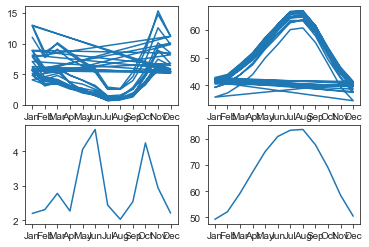

In [110]:

# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])


# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])

plt.show()

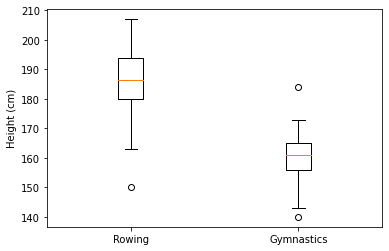

In [46]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Rowing', 'Gymnastics'])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

plt.show()

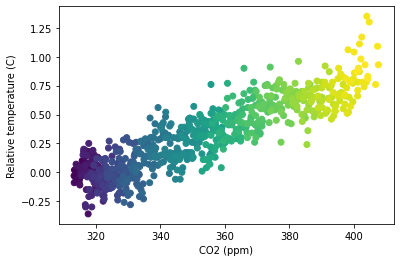

In [50]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c= climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")


plt.show()

Number of all countries: 193 

Number of all the drinking countries: 180 



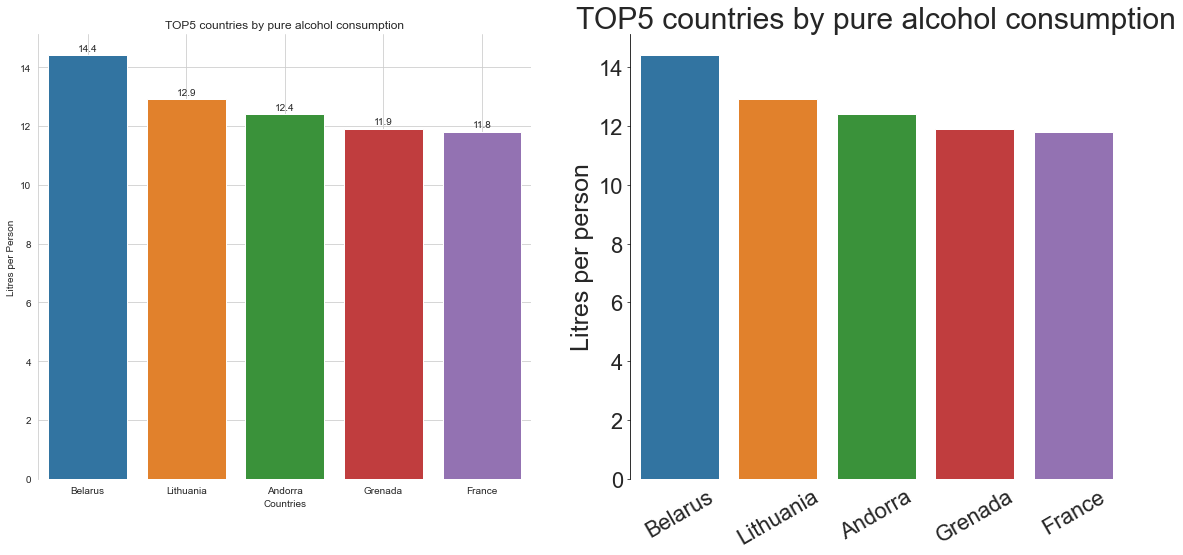

In [56]:
dft= pd.read_csv('drinks.csv')
print('Number of all countries:', len(dft), '\n')
df= dft[dft['total_litres_of_pure_alcohol']>0].reset_index(drop= True)

print('Number of all the drinking countries:', len(df), '\n')

top_5_drinking_countries= df.sort_values('total_litres_of_pure_alcohol', ascending= False)[:5].reset_index(drop= True)
fig, ax = plt.subplots(figsize=(16,7))
fig.tight_layout(pad=2)
sns.set_style('whitegrid')
plt.subplot(1,2,1, frameon= True)
ax = sns.barplot(x='country', y='total_litres_of_pure_alcohol', data= top_5_drinking_countries)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')
plt.title('TOP5 countries by pure alcohol consumption')
plt.xlabel('Countries')
plt.ylabel('Litres per Person')
ax.grid(True)
plt.subplot(1,2,2, frameon= True)
sns.set_style('ticks')
ax = sns.barplot(x='country', y='total_litres_of_pure_alcohol', data= top_5_drinking_countries)
plt.title('TOP5 countries by pure alcohol consumption', fontsize=30)
plt.xlabel(None)
plt.xticks(fontsize=22, rotation=30)
plt.ylabel('Litres per person', fontsize=25)
plt.yticks(fontsize=22)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
for _,s in ax.spines.items():
    s.set_color('black')
plt.show()

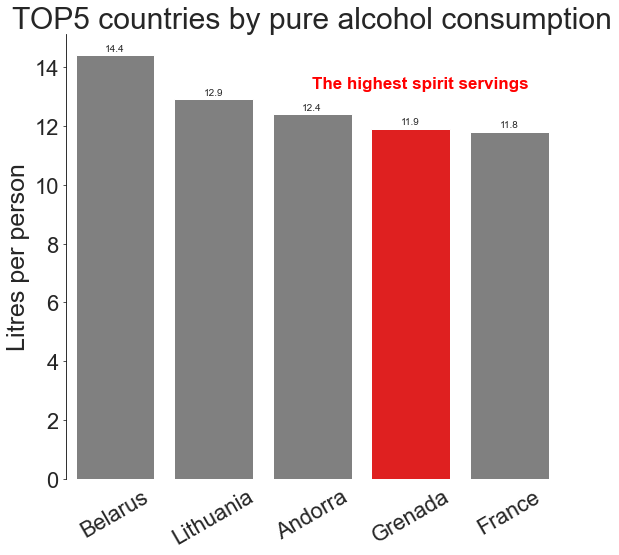

In [53]:
top_spirit= top_5_drinking_countries['spirit_servings']
colors= ['grey' if (p < max(top_spirit)) else 'red' for p in top_spirit]
fig, ax = plt.subplots(figsize=(16,7))
fig.tight_layout(pad=2)
sns.set_style('whitegrid')
plt.subplot(1,2,1, frameon= True)
ax = sns.barplot(x='country', y='total_litres_of_pure_alcohol', data= top_5_drinking_countries, palette= colors)
plt.title('TOP5 countries by pure alcohol consumption', fontsize=30)
plt.xlabel(None)
plt.xticks(fontsize=22, rotation=30)
plt.ylabel('Litres per person', fontsize=25)
plt.yticks(fontsize=22)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
ax.text(x=2., y=13.3, s='The highest spirit servings', color='red', size=17, weight='bold')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
    xytext=(0, 7), textcoords='offset points')
for _,s in ax.spines.items():
    s.set_color('black')
plt.show()

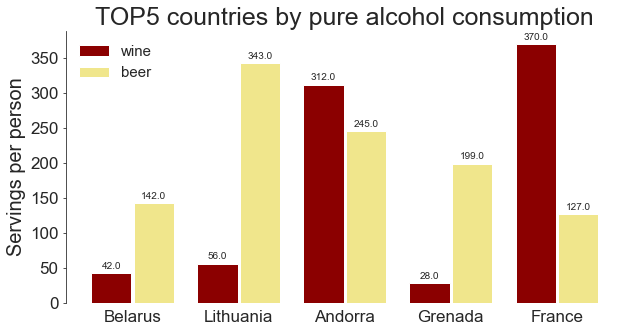

In [97]:
fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(top_5_drinking_countries))
width = 0.38
plt.bar(x-0.2, top_5_drinking_countries['wine_servings'],
        width, color='darkred', label='wine')
plt.bar(x+0.2, top_5_drinking_countries['beer_servings'],
        width, color='khaki', label='beer')
plt.title('TOP5 countries by pure alcohol consumption', fontsize=25)
plt.xlabel(None)
plt.xticks(top_5_drinking_countries.index, top_5_drinking_countries['country'], fontsize=17)
plt.ylabel('Servings per person', fontsize=20)
plt.yticks(fontsize=17)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
    xytext=(0, 7), textcoords='offset points')
plt.show()